In [64]:
import numpy as np
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import time
import seaborn as sns
%matplotlib inline

In [83]:
# read the list of patents
data = pd.read_csv('patent_200201_200205_univ.csv', skiprows = 1)

In [84]:
data.head()

,id,title,assignee,inventor/author,priority date,filing/creation date,publication date,grant date,result link
0,US6384191B1,Receptors for fibroblast growth factors,Regents Of The University Of California,"Lewis T. Williams, Daniel E. Johnson, Pauline ...",1989-07-06,1990-07-06,2002-05-07,2002-05-07,https://patents.google.com/patent/US6384191B1/en
1,US6391590B1,Recombinant streptavidin-metallothionein chime...,The Regents Of The University Of California,"Takeshi Sano, Alexander N. Glazer, Charles R. ...",1991-10-21,1991-10-21,2002-05-21,2002-05-21,https://patents.google.com/patent/US6391590B1/en
2,US6362160B1,Immunophilin-binding agents prevent glutamate ...,The Johns Hopkins University School Of Medicine,"Ted M. Dawson, Joseph P. Steiner, Valina L. Da...",1993-06-30,1993-06-30,2002-03-26,2002-03-26,https://patents.google.com/patent/US6362160B1/en
3,US6362175B1,Porphyrin compounds for imaging tissue oxygen,The Trustees Of The University Of Pennsylvania,"Sergei Vinogradov, David F. Wilson",1991-09-20,1993-10-15,2002-03-26,2002-03-26,https://patents.google.com/patent/US6362175B1/en
4,US6387379B1,Biofunctional surface modified ocular implants...,University Of Florida,"Eugene P. Goldberg, Ali Yahiaoui, Khalid Menta...",1987-04-10,1994-02-28,2002-05-14,2002-05-14,https://patents.google.com/patent/US6387379B1/en


In [50]:
### function to scrape a html page
# input: a url
# output: BeautifulSoup output
def generate_soup(url):
    # read the page
    page = urllib.urlopen(url).read()
    soup = BeautifulSoup(page, "lxml")
    
    return soup

In [49]:
### function to read liscenced information for a patent
# input: BeautifulSoup Output
# output: number of times maintainance fee was paid
def find_maintainance_years(soup):
    # find legal events
    legal_events = soup.find_all('tr', {'itemprop':'legalEvents'})
    
    # initiate status for no fee payments
    fee_payments = 0
    
    # check how many fee payments there are
    for event in legal_events:
        # read each legal event
        info = event.find('td', {'itemprop':'title'})
        
        for title in info:
            # if licensed
            if title.string == 'Fee payment':
                # change the licensing status
                fee_payments = fee_payments + 1
                
                break

    return fee_payments

In [85]:
# extract fee payment info for all of the patents
fee_payment_times = [] #store for all the patents

for i in range(data.shape[0]):
    if i % 50 == 0:
        print i
    
    url = data['result link'][i]
    soup = generate_soup(url)
    
    times = find_maintainance_years(soup)
    fee_payment_times.append(times)
    
    time.sleep(0.2)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [86]:
# add to the dataset and save
data['payment_times'] = fee_payment_times

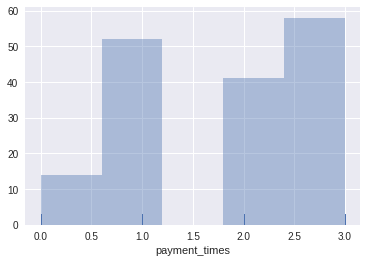

In [79]:
sns.distplot(data['payment_times'], kde=False, rug=True)

In [81]:
fee_payment_times = np.asarray(fee_payment_times)
np.mean(fee_payment_times < 2)

0.40000000000000002

In [82]:
data.to_csv('patent_200201_univ_payments.csv', index = False)

In [ ]:
print 

In [ ]:
# add licensed time

In [ ]:
# produce some graphs